In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [3]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


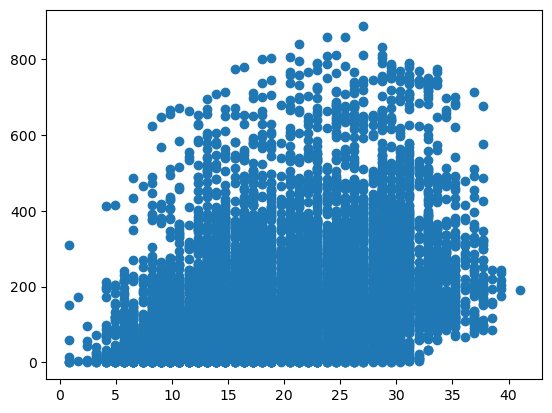

In [4]:
plt.scatter(bikes['temp'],bikes['registered'])

In [5]:
x = bikes['temp']
y = bikes['casual']

In [6]:
results = ols("casual ~ temp + humidity + workingday", data=bikes).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     2766.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:43:19   Log-Likelihood:                -54939.
No. Observations:               10886   AIC:                         1.099e+05
Df Residuals:                   10882   BIC:                         1.099e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.1426      1.663     31.961      0.0

In [7]:
"y_hat = 53.1426 + 2.9255temp - 0.8365humidity - 36.0416workingday"

'y_hat = 53.1426 + 2.9255temp - 0.8365humidity - 36.0416workingday'

In [8]:
53.1426 + (2.9255*9.84) - (0.8365*81) - (36.0416*0)

14.173019999999994

In [9]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
pred_vals = results.predict(bikes[['temp','humidity','workingday']])

In [11]:
pred_vals

0        14.175362
1        12.612922
2        12.612922
3        19.194189
4        19.194189
           ...    
10881    20.856745
10882    12.602536
10883     6.857740
10884     6.857740
10885     0.276474
Length: 10886, dtype: float64

In [12]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),bikes['casual']], axis=1)

In [13]:
res

,y_hat,casual
0,14.175362,3
1,12.612922,8
2,12.612922,5
3,19.194189,3
4,19.194189,0
...,...,...
10881,20.856745,7
10882,12.602536,10
10883,6.857740,4
10884,6.857740,12


In [14]:
res['error'] = res['y_hat'] - res['casual']

In [15]:
res.head(1)

,y_hat,casual,error
0,14.175362,3,11.175362


In [16]:
res['sq_error'] = res['error']**2

In [17]:
np.sqrt(res['sq_error'].mean())

37.630976661566194

In [18]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


(array([   9.,   18.,   48.,   95.,  160.,  315., 2110., 5562., 2344.,
         225.]),
 array([-278.91580946, -241.14950457, -203.38319967, -165.61689478,
        -127.85058988,  -90.08428498,  -52.31798009,  -14.55167519,
          23.2146297 ,   60.9809346 ,   98.7472395 ]),
 <BarContainer object of 10 artists>)

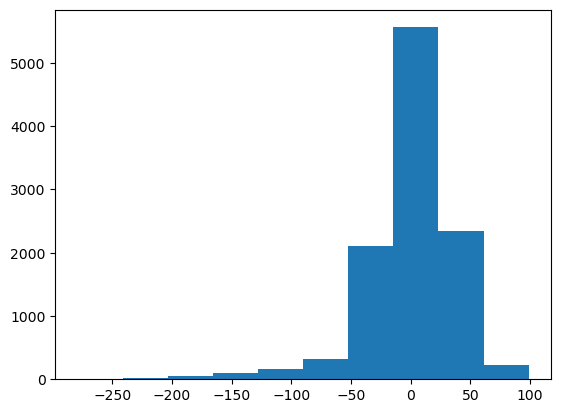

In [19]:
plt.hist(res['error'])

(array([7447., 1807.,  805.,  322.,  203.,  127.,   98.,   48.,   18.,
          11.]),
 array([  0. ,  36.7,  73.4, 110.1, 146.8, 183.5, 220.2, 256.9, 293.6,
        330.3, 367. ]),
 <BarContainer object of 10 artists>)

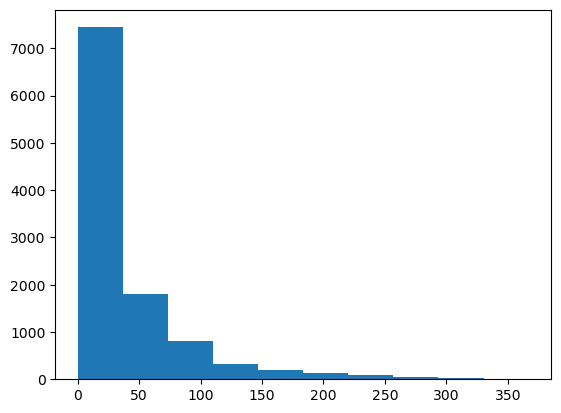

In [20]:
plt.hist(bikes['casual'])

In [21]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


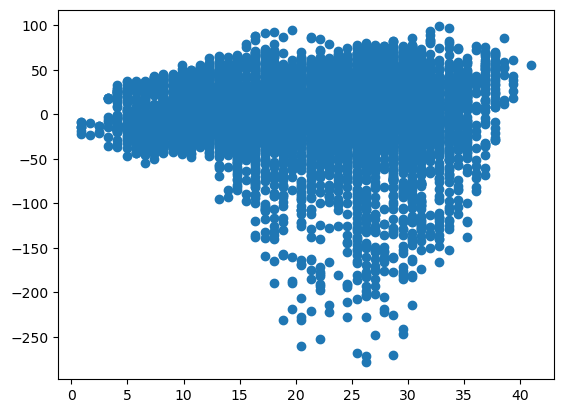

In [22]:
plt.scatter(bikes['temp'],res['error'])

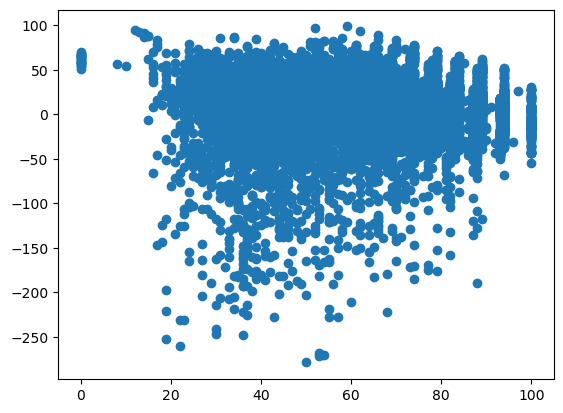

In [23]:
plt.scatter(bikes['humidity'],res['error'])

((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([-278.91580946, -271.42522287, -270.06496056, ...,   94.67880447,
           97.00144858,   98.7472395 ])),
 (35.25481020993883, 7.805275588370355e-14, 0.9365456663477384))

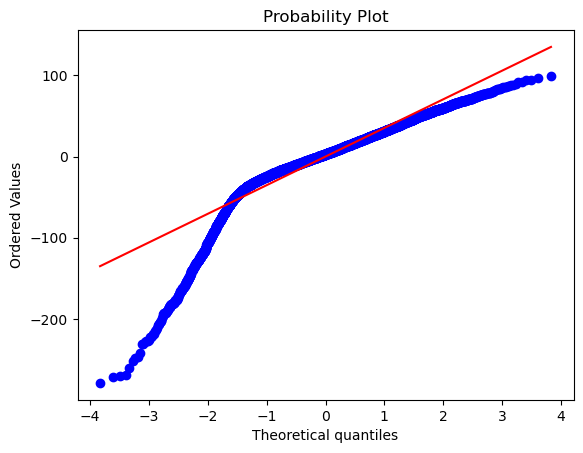

In [24]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [25]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_temp  dfb_humidity  dfb_workingday       cooks_d  \
0          -0.002088  0.003502     -0.002551        0.004024  1.135234e-05   
1          -0.000981  0.001573     -0.000984        0.001658  1.996754e-06   
2          -0.001620  0.002597     -0.001623        0.002736  5.438450e-06   
3          -0.003977  0.005157     -0.002407        0.005842  2.186977e-05   
4          -0.004714  0.006113     -0.002853        0.006924  3.072312e-05   
...              ...       ...           ...             ...           ...   
10881      -0.002906  0.002324      0.002299       -0.002460  7.083872e-06   
10882      -0.000409  0.000491      0.000195       -0.000466  2.282366e-07   
10883      -0.000384  0.000606      0.000067       -0.000516  2.865256e-07   
10884       0.000690 -0.001090     -0.000121        0.000928  9.277390e-07   
10885       0.000378 -0.000874      0.000153        0.000677  5.320960e-07   

       standard_resid  hat_diag  dffits_internal  student_resid

In [26]:
infl.summary_frame()

,dfb_Intercept,dfb_temp,dfb_humidity,dfb_workingday,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.002088,0.003502,-0.002551,0.004024,1.135234e-05,-0.296994,0.000515,-0.006739,-0.296982,-0.006738
1,-0.000981,0.001573,-0.000984,0.001658,1.996754e-06,-0.122593,0.000531,-0.002826,-0.122588,-0.002826
2,-0.001620,0.002597,-0.001623,0.002736,5.438450e-06,-0.202321,0.000531,-0.004664,-0.202312,-0.004664
3,-0.003977,0.005157,-0.002407,0.005842,2.186977e-05,-0.430365,0.000472,-0.009353,-0.430348,-0.009353
4,-0.004714,0.006113,-0.002853,0.006924,3.072312e-05,-0.510090,0.000472,-0.011086,-0.510073,-0.011085
...,...,...,...,...,...,...,...,...,...,...
10881,-0.002906,0.002324,0.002299,-0.002460,7.083872e-06,-0.368198,0.000209,-0.005323,-0.368183,-0.005323
10882,-0.000409,0.000491,0.000195,-0.000466,2.282366e-07,-0.069153,0.000191,-0.000955,-0.069150,-0.000955
10883,-0.000384,0.000606,0.000067,-0.000516,2.865256e-07,-0.075935,0.000199,-0.001071,-0.075931,-0.001071
10884,0.000690,-0.001090,-0.000121,0.000928,9.277390e-07,0.136638,0.000199,0.001926,0.136632,0.001926


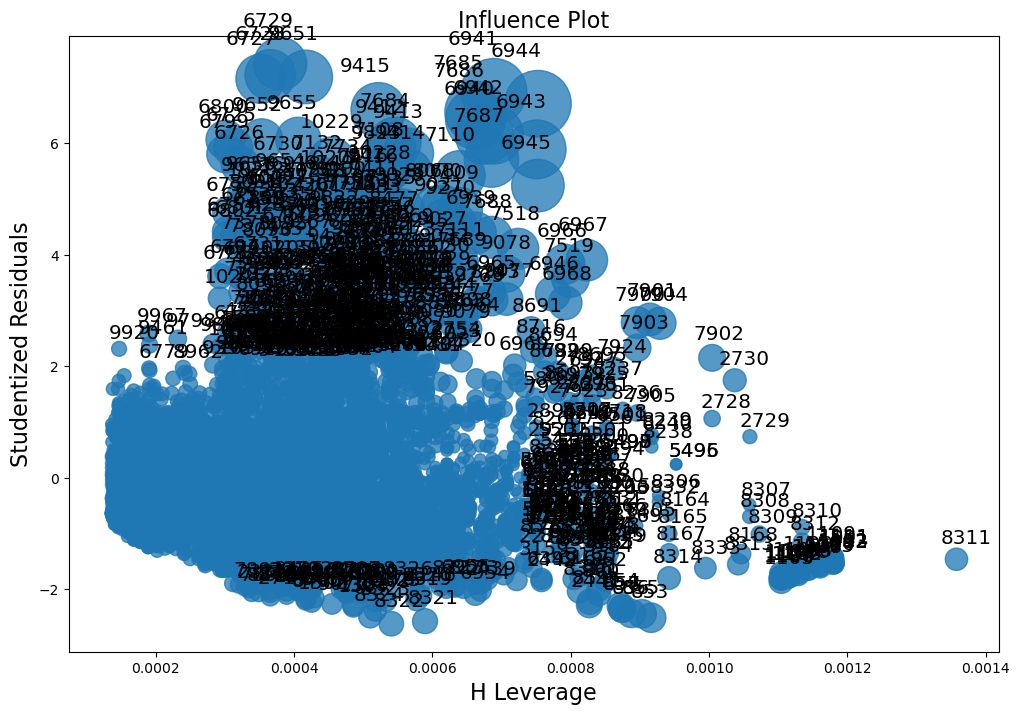

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [28]:
res

,y_hat,casual,error,sq_error
0,14.175362,3,11.175362,124.888726
1,12.612922,8,4.612922,21.279053
2,12.612922,5,7.612922,57.956588
3,19.194189,3,16.194189,262.251766
4,19.194189,0,19.194189,368.416901
...,...,...,...,...
10881,20.856745,7,13.856745,192.009387
10882,12.602536,10,2.602536,6.773194
10883,6.857740,4,2.857740,8.166680
10884,6.857740,12,-5.142260,26.442834


In [29]:
dummies_season = pd.get_dummies(bikes.season, dtype=int)

In [30]:
dummies_season.rename(columns = {1:'win', 2:'spr', 3:'sum', 4:'fall'}, inplace = True)

In [31]:
bikes = pd.concat([bikes,dummies_season], axis=1)

In [32]:
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,win,spr,sum,fall
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,0,0,0,1
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,0,0,0,1
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,0,0,0,1
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,0,0,0,1


In [33]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [35]:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [36]:
bikes.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [37]:
# separate features and target
categorical_features = ['workingday','season', 'weather']
numerical_features = ['temp','humidity', 'windspeed']
target = 'casual'

In [38]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(bikes[categorical_features + numerical_features]
                                                    ,bikes[target],
                                                    test_size = 0.3, random_state=1234)

In [39]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [40]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [41]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [42]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workingday', 'season',
                                                   'weather']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed'])])),
                ('regressor', LinearRegression())])

In [43]:
pred = linear_regression.predict(X_test)

In [44]:
pred

array([  3.984375,  54.328125,  28.109375, ..., -11.453125,   8.859375,
        10.03125 ])

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
np.sqrt(mean_squared_error(pred,y_test))

37.03380157131466

In [47]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [48]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workingday', 'season',
                                                   'weather']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed'])])),
                ('regressor', Ridge(alpha=3.0))])

In [49]:
pred_ridge = ridge_regression.predict(X_test)

In [50]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

37.04428469172452

In [51]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [52]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workingday', 'season',
                                                   'weather']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed'])])),
                ('regressor', Lasso())])

In [53]:
lasso_pred = lasso_regression.predict(X_test)

In [54]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

37.32788927335004

In [59]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.2))
])

In [60]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workingday', 'season',
                                                   'weather']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed'])])),
                ('regressor', ElasticNet(l1_ratio=0.2))])

In [61]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [62]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

40.87029708681253